In [84]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore')
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from scipy.special import cbrt

https://www.um.es/or/ampliacion/node21.html

Sea X una variable aleatoria con función de densidad  $f:I\rightarrow \mathbb{R} $. Supóngase que
$f(x)=Cg(x)h(x)$ con C una constante, $C\geq 1$, $0\leq g(x) \leq 1$ y h(x) una función de densidad en I. Si  $U\equiv U(0,1)$ e Y (con función de densidad $h$) son independientes, entonces 
$$h(x\vert U\leq g(Y))=f(x)$$


Intentemos utilizar el método para generar: $f(x) = 30(x^2-2x^3+x^4)$

In [2]:
N = 500
f = lambda x : 30*(x**2-2*x**3+x**4)
a = f(fmin(lambda x:-f(x),0,disp=0))
phi = lambda x: a*np.sin(np.pi*x)

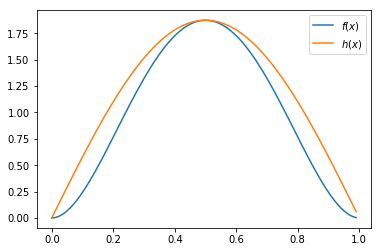

In [3]:
x = np.arange(0,1,.01)
plt.plot(x,f(x),label='$f(x)$')
plt.plot(x,phi(x),label='$h(x)$')
plt.legend()
plt.show()

$h(x) = \alpha\sin(\pi x), \alpha = max(f(x))$

$\phi(x) = C\,h(x) = 1.875C\sin(\pi x)$

$h(x)= \frac{\phi(x)}{C}$,se integra sobre $I : [0,1]\rightarrow C = \int_0^1 \phi(x) dx$

$C = \int_0^1 1.875\sin(\pi x) dx $

$=1.875(1 -\frac{\cos(\pi)}{\pi}) = 1.19366207$

In [4]:
1.875*(((1- np.cos(np.pi * 1))/np.pi))# - 1.875*((1- np.cos(np.pi * 0)/np.pi))

1.1936620731892151

$h(x) =1.570796327\sin(\pi x)$

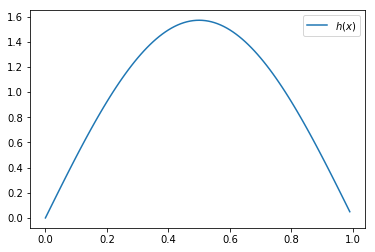

In [5]:
h = lambda x : 1.570796327*np.sin(np.pi*x)
plt.plot(x,h(x),label='$h(x)$')
plt.legend()
plt.show()

$h(x) =1.570796327\sin(\pi x), \int_0^x h(x) dx \rightarrow H(x) = 1.570796327\,(\frac{1 -\cos(\pi x)}{\pi}) : P(H(X)|X=x)$

$H^{-1}(x)=\frac{\arccos(1-\frac{\pi x}{1.570796327})}{\pi}$

$Y=H^{-1}(U),U\equiv U(0,1)$

$$h(x\vert U\leq g(Y))=f(x)$$

$$g(x)=\frac{f(x)}{C h(x)} = \frac{f(x)}{\phi(x)}$$
$$ℎ(𝑥|𝑈≤𝑔(𝑌))=𝑓(𝑥)$$

In [6]:
H_1 = lambda x: np.arccos((1-np.pi*x/1.570796327))/np.pi

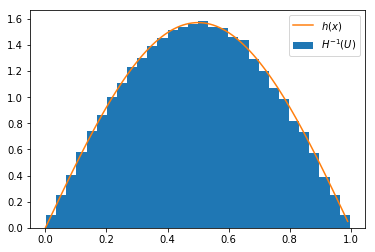

In [7]:
samples = 100000
bins = 30
plt.hist(list(map(lambda x: H_1(x),np.random.rand(samples))),weights=np.ones(samples)*bins/samples,bins=bins,label="$H^{-1}(U)$")
plt.plot(x,h(x),label='$h(x)$')
plt.legend()
plt.show()

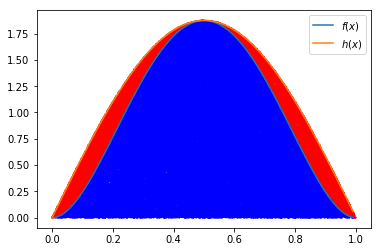

In [8]:
x = np.arange(0,1,.01)
w,y,z=zip(*map(lambda r1,r2:(r1,r2*phi(r1),'blue' if r2*phi(r1) < f(r1) else 'red'),H_1(np.random.rand(samples)),np.random.rand(samples)))
plt.scatter(w,y,color=z,s=1)
plt.plot(x,f(x),label='$f(x)$')
plt.plot(x,phi(x),label='$h(x)$')
plt.legend()
plt.show()

La probabilidad de aceptar viene dada por $\frac1 c$,dado que $c \ge 1$ para toda $c$.
$$C_{constante} :\frac1 {1.875} < C_{senoidal} :\frac1 {1.19366207}$$

Por lo tanto utilizar $C_{senoidal}$ es un generador de $f(x)$ más eficiente.

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

$\phi(x) =  Ch(x) = y1 -(1.93(x-x_1))^2$

In [140]:
f2 = lambda x : 20*x*(1-x)**3
x1 = fmin(lambda x:-f2(x),0,disp=0)
y1 = f2(x1)
# phi2 = lambda x: y1-(1.93*(x-x1))**2
phi2 = y1
# $C=\int_0^1\phi(x)dx=y_1-\frac{1.93^2}{3}[(1-x_1)^3+x_1^3]$

$C=\int_0^1\phi(x)dx=M(b-a)$

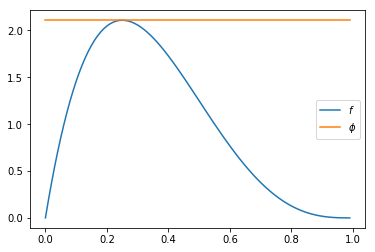

In [141]:
a = np.arange(0,1,.01)
# aa = lambda x: y1-(1.95*(x-x1))**2
plt.plot(a,f2(a),label='$f$')
plt.plot(a,np.ones(len(a))*phi2,label='$\phi$')
# plt.plot(a,phi2(a),label='$\phi$')
plt.legend()
plt.show()

$ h(x) = 1,$
$ H(x) = x,$
$ H^{-1}(x) = x$

Si $u<g(Y) | Y = H^{-1}(x) \rightarrow Y$ se acepta

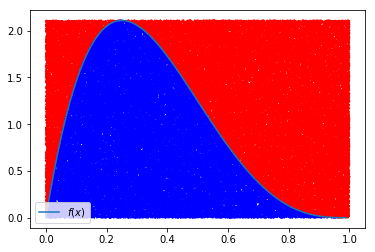

In [254]:
H_1 = lambda x:x
x = np.arange(0,1,.01)

xax = map(lambda r1,r2:(r1,r2*phi2,'blue' if r2*phi2 < f2(r1) else 'red'),H_1(np.random.rand(samples)),np.random.rand(samples))
w,y,z=zip(*xax)
plt.scatter(w,y,color=z,s=1)
plt.plot(x,f2(x),label='$f(x)$')
# plt.plot(x,phi2(x),label='$h(x)$')
plt.legend()
plt.show()

In [257]:
samples = 100000
mapu = map(lambda r1,r2: (r1,True) if r2*phi2 < f2(r1) else (r1,False),H_1(np.random.rand(samples)),np.random.rand(samples))
randoms,_ = zip(*filter(lambda b: b[1] ,mapu))
randoms

(0.21408327799358928,
 0.11568699469922628,
 0.312131984637529,
 0.7648617192031916,
 0.38185709066116125,
 0.5214144846193832,
 0.37086080955192857,
 0.36962496395230526,
 0.5497066203911366,
 0.43692141686806685,
 0.10241775019903454,
 0.17396125316036815,
 0.3705372180477955,
 0.14519661143542628,
 0.2631820791080386,
 0.5569151387352459,
 0.19837388282478463,
 0.48852409598747815,
 0.46120765594564805,
 0.4543186150420314,
 0.317597938632489,
 0.3147254537847971,
 0.20623446692002978,
 0.383432825402128,
 0.48309596915140707,
 0.3549586168239631,
 0.5123147135769806,
 0.07133846906911823,
 0.015386063171197506,
 0.4415195660250285,
 0.35137948525328977,
 0.3014867169544039,
 0.2545985541031197,
 0.08487287151239042,
 0.3584606111461739,
 0.12073418570670047,
 0.3892793469155368,
 0.24616873218783242,
 0.07812291143784933,
 0.37450498229638784,
 0.12123691098523892,
 0.18606433889901086,
 0.2338927783377852,
 0.37381145684453154,
 0.21162549493427907,
 0.4593457041760035,
 0.3997992

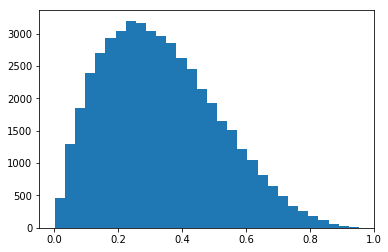

In [256]:
plt.hist(randoms,bins=30)
plt.show()

Se demuestra que 'randoms' son aleatorios con distribución f(x)